## Uji Hipotesis - Model Prediksi BTC-USD 

In [1]:
# lib statistic 
import scipy.stats as sc

# lib manipulation dataset
import pandas as pd
import numpy as np

# lib data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# lib min-max scaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load dataset
dataset = pd.read_excel("dataset/hasil_penelitian.xlsx", sheet_name="hasil evaluasi windows")
np.round(dataset.tail(),3)

,LSTM-R,LSTM-MAE,LSTM-RMSE,LSTM-MAPE,LSTM-TIME,GRU-R,GRU-MAE,GRU-RMSE,GRU-MAPE,GRU-TIME
25,0.996,998.54,1389.89,0.033,206.71,0.998,745.23,1138.93,0.022,182.44
26,0.996,927.54,1492.65,0.026,212.06,0.998,655.64,1057.58,0.020,187.18
27,0.997,1103.58,1731.08,0.031,200.93,0.998,742.61,1135.24,0.022,175.36
28,0.996,1053.37,1506.68,0.034,201.54,0.998,959.82,1430.14,0.027,179.48
29,0.996,1153.48,1703.01,0.035,215.59,0.997,901.25,1218.17,0.030,186.33


### Hypothesis Test of Non-parametric

In [3]:
def boxplot(data, min, max, title):

  # create boxplot
  fig, ax = plt.subplots(figsize=(8,4))
  sns.boxplot(data=data)

  # set labels
  ax.set_title(title)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_ylim(min,max)
  ax.grid(True)

  # show boxplot
  plt.show()

In [21]:
# Hipotesa Awal
# H0 = Data terdistribusi normal
# H1 = Data tidak terdistribusi normal

# Interpretasi hasil:
# Terima HO = p-value > 0.05 
# Terima H1 = p-value < 0.05 

# func normality test
def normality(lstm, gru):

  # uji-shapiro-wilk
  print("Hasil Uji-Shapiro-Wilk")
  print("----------------------")
  print("p-value shapiro wilk:",np.round(sc.shapiro(lstm).pvalue,6),"(untuk LSTM)")
  print("p-value shapiro wilk:",np.round(sc.shapiro(gru).pvalue,6),"(untuk GRU)")

In [22]:
# func hypothesis test
def hypothesis(lstm, gru):
  
  # Mann-Whitney Test
  Mann_Whitney = np.round(sc.mannwhitneyu(lstm, gru).pvalue,4)

  # Intrepetasi hasil
  print("Mann_Whitney")
  if Mann_Whitney < 0.05:
    print("Karena p-value:",Mann_Whitney,"maka Terima H0")
  else :
    print("Karena p-value:",Mann_Whitney,"maka Terima H1")
  print("")
  # --------------------------------------------------------------
  
  # Wilcoxon Rank Test
  Wilcoxon = np.round(sc.wilcoxon(lstm, gru).pvalue,4)

  # Intrepetasi hasil
  print("Wilcoxon Rank Test")
  if Wilcoxon < 0.05:
    print("Karena p-value:",Wilcoxon,"maka Terima H0")
  else :
    print("Karena p-value:",Wilcoxon,"maka Terima H1")
  print("")
  # --------------------------------------------------------------

  # Kruskal-Wallis Test
  Kruskal_Wallis = np.round(sc.kruskal(lstm, gru).pvalue,4)

  # Intrepetasi hasil
  print("Kruskal-Wallis Test")
  if Kruskal_Wallis < 0.05:
    print("Karena p-value:",Kruskal_Wallis,"maka Terima H0")
  else :
    print("Karena p-value:",Kruskal_Wallis,"maka Terima H1")
  print("")
  # --------------------------------------------------------------

### Hypothesis Test for R Values

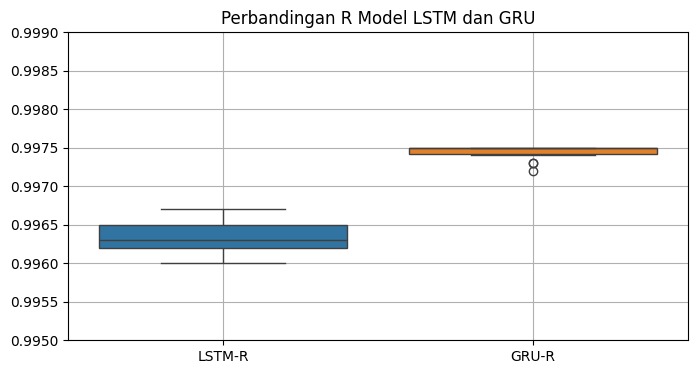

In [23]:
boxplot(
  data=dataset[["LSTM-R", "GRU-R"]], min=0.9950, max=0.999,
  title="Perbandingan R Model LSTM dan GRU")

In [24]:
normality(dataset["LSTM-R"], dataset["GRU-R"])

Hasil Uji-Shapiro-Wilk
----------------------
p-value shapiro wilk: 0.149936 (untuk LSTM)
p-value shapiro wilk: 0.0 (untuk GRU)


In [25]:
hypothesis(dataset["LSTM-R"], dataset["GRU-R"])

Mann_Whitney
Karena p-value: 0.0 maka Terima H0

Wilcoxon Rank Test
Karena p-value: 0.0 maka Terima H0

Kruskal-Wallis Test
Karena p-value: 0.0 maka Terima H0



### Hypothesis Test for MAE Values

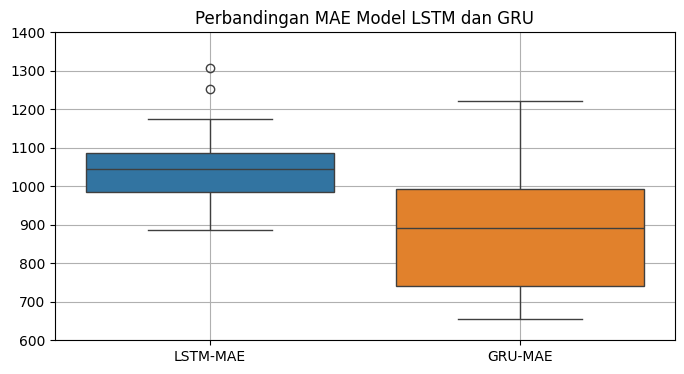

In [26]:
boxplot(
  data=dataset[["LSTM-MAE", "GRU-MAE"]], min=600, max=1400,
  title="Perbandingan MAE Model LSTM dan GRU")

In [27]:
normality(dataset["LSTM-MAE"], dataset["GRU-MAE"])

Hasil Uji-Shapiro-Wilk
----------------------
p-value shapiro wilk: 0.314431 (untuk LSTM)
p-value shapiro wilk: 0.081616 (untuk GRU)


In [28]:
hypothesis(dataset["LSTM-MAE"], dataset["GRU-MAE"])

Mann_Whitney
Karena p-value: 0.0 maka Terima H0

Wilcoxon Rank Test
Karena p-value: 0.0 maka Terima H0

Kruskal-Wallis Test
Karena p-value: 0.0 maka Terima H0



### Hypothesis Test for RMSE Values

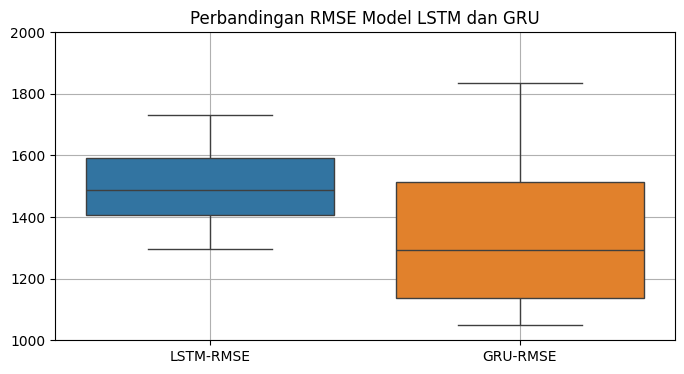

In [29]:
boxplot(
  data=dataset[["LSTM-RMSE", "GRU-RMSE"]], min=1000, max=2000,
  title="Perbandingan RMSE Model LSTM dan GRU")

In [30]:
normality(dataset["LSTM-RMSE"], dataset["GRU-RMSE"])

Hasil Uji-Shapiro-Wilk
----------------------
p-value shapiro wilk: 0.358035 (untuk LSTM)
p-value shapiro wilk: 0.032602 (untuk GRU)


In [31]:
hypothesis(dataset["LSTM-RMSE"], dataset["GRU-RMSE"])

Mann_Whitney
Karena p-value: 0.0021 maka Terima H0

Wilcoxon Rank Test
Karena p-value: 0.0007 maka Terima H0

Kruskal-Wallis Test
Karena p-value: 0.002 maka Terima H0



### Hypothesis Test for MAPE Values

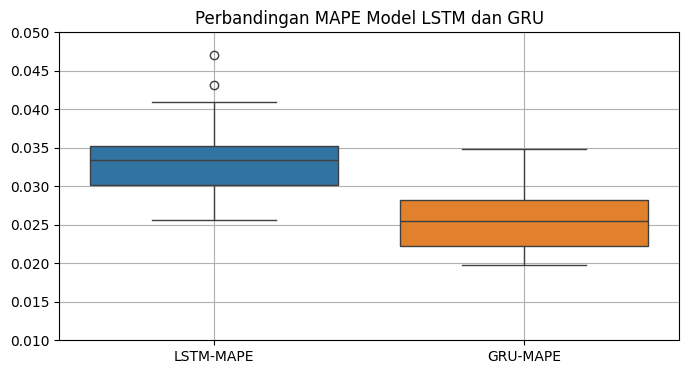

In [32]:
boxplot(
  data=dataset[["LSTM-MAPE", "GRU-MAPE"]], min=0.01, max=0.05,
  title="Perbandingan MAPE Model LSTM dan GRU")

In [33]:
normality(dataset["LSTM-MAPE"], dataset["GRU-MAPE"])

Hasil Uji-Shapiro-Wilk
----------------------
p-value shapiro wilk: 0.185149 (untuk LSTM)
p-value shapiro wilk: 0.20424 (untuk GRU)


In [34]:
hypothesis(dataset["LSTM-MAPE"], dataset["GRU-MAPE"])

Mann_Whitney
Karena p-value: 0.0 maka Terima H0

Wilcoxon Rank Test
Karena p-value: 0.0 maka Terima H0

Kruskal-Wallis Test
Karena p-value: 0.0 maka Terima H0



### Hypothesis Test for Time Values

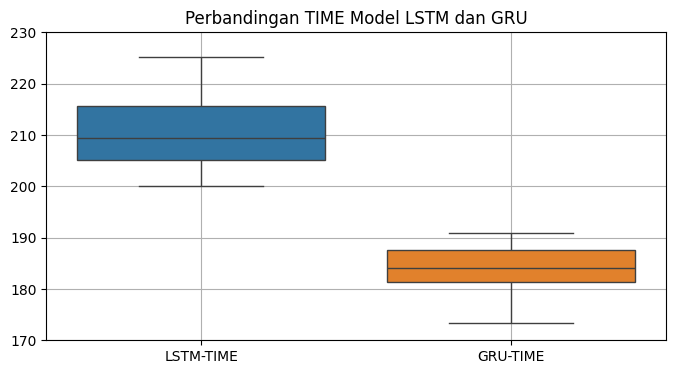

In [35]:
boxplot(
  data=dataset[["LSTM-TIME", "GRU-TIME"]], min=170, max=230,
  title="Perbandingan TIME Model LSTM dan GRU")

In [36]:
normality(dataset["LSTM-TIME"], dataset["GRU-TIME"])

Hasil Uji-Shapiro-Wilk
----------------------
p-value shapiro wilk: 0.276476 (untuk LSTM)
p-value shapiro wilk: 0.411805 (untuk GRU)


In [37]:
hypothesis(dataset["LSTM-TIME"], dataset["GRU-TIME"])

Mann_Whitney
Karena p-value: 0.0 maka Terima H0

Wilcoxon Rank Test
Karena p-value: 0.0 maka Terima H0

Kruskal-Wallis Test
Karena p-value: 0.0 maka Terima H0

